In [3]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import ruptures as rpt

In [29]:
# import data
db_data = pd.read_excel("25042019_mechanical_multivariate.xlsx", sheet_name="Sheet1")
db_data = db_data.dropna(axis=1)
db_data

,TimeStamp,Active Power (MW),Reactive Power (MW),Power Factor,Electrical Frequency (Hz),Actual Governor Speed (RPM),UGB X-displacement (µm),UGB Y-displacement (µm),LGB X-displacement (µm),LGB Y-displacement (µm),...,Gen. Air Cooler – Water Inlet Temperature (˚C),Gen. Air Cooler – Water Outlet Temperature (˚C),LGS Effeciency (%),Lower Canal Level (mASL),Wicked Gate Position (%),Setpoint – Active Power (MW),Setpoint – Governor Power (MW),Setpoint – Turbine Active Power (MW),Setpoint – Turbine Speed (RPM),Setpoint – Turbine Opening
0,04/25/2019 00:00:00,54.41,16.87,0.82,50.48,274.74,-124.96,-124.90,-124.76,-124.84,...,67.0,63.73,0.96,314.62,74.65,0,62.0,62.0,278.83,0
1,04/25/2019 00:00:10,54.52,16.75,0.82,50.52,274.74,-124.96,-124.90,-124.76,-124.84,...,67.0,63.74,0.96,314.62,74.25,0,62.0,62.0,278.83,0
2,04/25/2019 00:00:20,54.63,16.64,0.82,50.56,274.84,-124.96,-124.90,-124.76,-124.84,...,67.0,63.75,0.96,314.62,73.86,0,62.0,62.0,278.83,0
3,04/25/2019 00:00:30,54.74,16.52,0.82,50.61,276.41,-124.96,-124.90,-124.76,-124.84,...,67.0,63.76,0.96,314.62,73.46,0,62.0,62.0,278.83,0
4,04/25/2019 00:00:40,54.85,16.41,0.82,50.65,276.41,-124.96,-124.90,-124.76,-124.84,...,67.0,63.77,0.96,314.62,73.06,0,62.0,62.0,278.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,04/25/2019 23:59:18,52.77,23.54,0.81,50.28,273.32,-124.94,-124.88,-124.74,-124.81,...,67.0,64.00,0.97,314.61,71.76,0,58.0,58.0,278.22,0
8636,04/25/2019 23:59:28,52.86,24.13,0.81,50.19,278.13,-124.94,-124.88,-124.74,-124.81,...,67.0,64.00,0.97,314.61,72.22,0,58.0,58.0,278.22,0
8637,04/25/2019 23:59:38,52.94,24.71,0.81,50.10,273.73,-124.94,-124.88,-124.74,-124.81,...,67.0,64.00,0.97,314.61,72.68,0,58.0,58.0,278.22,0
8638,04/25/2019 23:59:48,53.02,25.30,0.81,50.01,269.50,-124.94,-124.88,-124.74,-124.81,...,67.0,64.00,0.97,314.61,73.14,0,58.0,58.0,278.22,0


In [30]:
# filter the data
# select range of data (if necessary)
db_data['TimeStamp'] = pd.to_datetime(db_data['TimeStamp'])

#start_time = pd.to_datetime('2023-05-22 19:00:00')
#end_time = pd.to_datetime('2023-05-22 21:00:00')

#start_time = pd.to_datetime('2022-03-26 15:00:00')
#end_time = pd.to_datetime('2022-03-26 17:00:00')

#start_time = pd.to_datetime('2021-05-28 03:00:00')
#end_time = pd.to_datetime('2021-05-28 07:00:00')

start_time = pd.to_datetime('2019-04-25 03:00:00')
end_time = pd.to_datetime('2019-04-25 07:00:00')

db_data_observed = db_data[(db_data['TimeStamp']>=start_time) & (db_data['TimeStamp']<=end_time)]
db_data_observed = db_data_observed.reset_index(drop=True)

In [31]:
# preaparing data to a numpy array
time_data = db_data_observed['TimeStamp']
obs_data = db_data_observed.drop(columns=['TimeStamp'])
label = obs_data.columns
obs_data = obs_data.to_numpy().T

time_data

0      2019-04-25 03:00:01
1      2019-04-25 03:00:11
2      2019-04-25 03:00:21
3      2019-04-25 03:00:31
4      2019-04-25 03:00:41
               ...        
1435   2019-04-25 06:59:12
1436   2019-04-25 06:59:22
1437   2019-04-25 06:59:32
1438   2019-04-25 06:59:42
1439   2019-04-25 06:59:52
Name: TimeStamp, Length: 1440, dtype: datetime64[ns]

/tmp/ipykernel_2007/1899892909.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


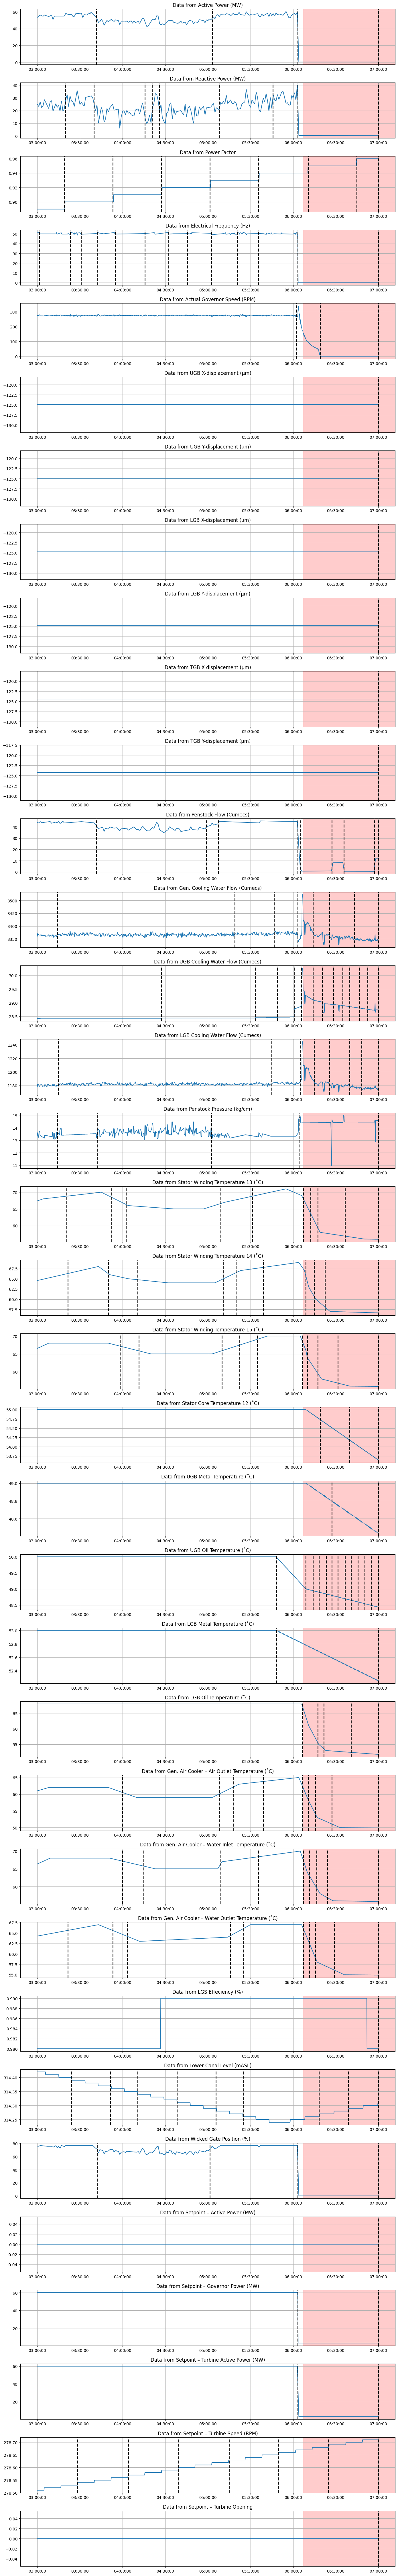

In [32]:
# implement the hange point detection algorithm
def detect_change_points(signal):
    algo = rpt.Pelt(model="rbf").fit(signal)
    result = algo.predict(pen=10)  # Adjust `pen` based on data characteristics
    return result

# change_points_combined = detect_change_points_combined(obs_data[0])

signals = obs_data
n_series = np.shape(signals)[0]

change_point_results = []

for i in range(n_series):
    signal = signals[i, :]
    change_points = detect_change_points(signal)
    change_point_results.append(change_points)

fig = plt.figure(figsize=(14, 90))

# Plot each signal and detected change points
for i in range(n_series):
    ax = fig.add_subplot(n_series, 1, i + 1)
    ax.plot(time_data, signals[i, :])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    ax.axvspan(
           #'2023-05-22 20:13:00',
           #'2023-05-22 20:32:00',
           #'2022-03-26 16:17:00',
           #'2022-03-26 22:28:00',
           #'2021-05-28 06:15:00',
           #'2021-05-28 11:35:00',
           '2019-04-25 06:07:00',
           '2019-04-25 11:27:00',
           alpha=0.2,
           color='red'
        )

    for cp in change_point_results[i]:
        ax.axvline(time_data[cp-1], color='black', linestyle='--', linewidth=2)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    ax.set_title("Data from " + label[i])
    ax.grid()
    
fig.tight_layout()
fig.show()